# Effects of tangential velocity in the reactive relativistic Riemann problem

This notebook generates the results presented in the 2018 paper by A. Harpole and I. Hawke.

In [1]:
from r3d2 import State, RiemannProblem, eos_defns, wave
from IPython.display import display_png
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
from scipy.optimize import brentq
import numpy

In [2]:
rcParams['figure.figsize'] = (10, 8)
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
pyplot.rc("font", size=18)

In [3]:
def rayleigh(Vs, u, q, gamma):
    def find_root(p, V):
        return p - 1 + u**2 * (V - 1 + gamma / (gamma - 1) * (p * V**2 - 1) - q)
    
    ps = numpy.zeros_like(Vs)
    pmin = 0
    pmax = 20
    for i, V in enumerate(Vs):
        try:
            ps[i] = brentq(find_root, pmin, pmax, args=(V))
        except ValueError:
            ps[i] = None
    return ps

def hugoniot(Vs, q, gamma):
    def find_root(p, V):
        return (gamma + 1) / (gamma-1) * (p*V - 1) - (p-V) - 2*q - \
            gamma/(gamma-1) * p*(1-V**2) + gamma / (gamma-1)**2 * (p**2*V**2 - 1) - \
            q*(p+(gamma+1)/(gamma-1)) - q**2
            
    ps = numpy.zeros_like(Vs)
    pmin = 0
    pmax = 20
    for i, V in enumerate(Vs):
        try:
            ps[i] = brentq(find_root, pmin, pmax, args=(V))
            
        except ValueError:
            ps[i] = None
    return ps

## Changing $q$

Pressure-volume plot for the relativistic reactive Riemann problem for normal 4-velocity $u_S = 0.35$, adiabatic index $\gamma=5/3$ and various values of $\hat{q}$. Plotted are the Rayleigh lines and the Hugoniot curves. Unlike for the Newtonian case, both the Rayleigh lines and the Hugoniot curves are functions of functions of $\hat{q}$, with only the lines for $\hat{q}$ intersecting the (1,1) point. As $\hat{q}$ increases, both the Rayleigh lines and Hugoniot curves move rightwards, away from the (1,1) point.

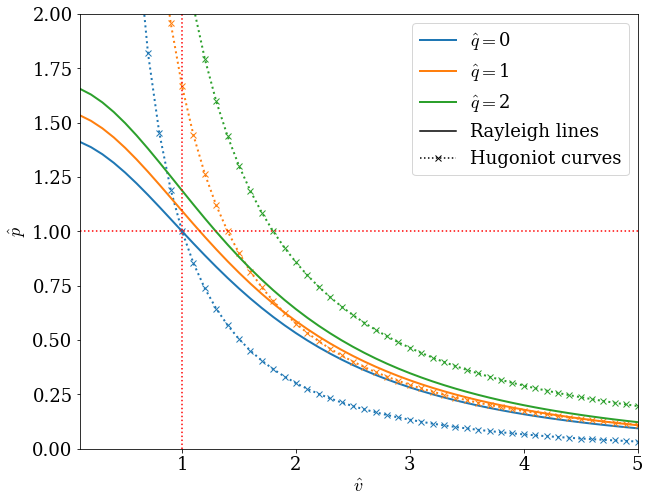

In [4]:
gamma = 5/3
qs = [0, 1, 2]
Vs = numpy.linspace(0.1, 5)
r_ps = []
h_ps = []
u = 0.35

for q in qs:
    r_ps.append(rayleigh(Vs, u, q, gamma))
    h_ps.append(hugoniot(Vs, q, gamma))

fig, ax = pyplot.subplots()

for r, h, q in zip(r_ps, h_ps, qs):
    l = ax.plot(Vs, r, '-', linewidth=2, label=r'$\hat{q}'+f' = ${q}')[0]
    ax.plot(Vs, h, 'x:', color=l.get_color(), linewidth=2, label='_nolegend_')
ax.plot(Vs, numpy.ones_like(Vs), 'r:')
ax.plot([1,1], [0, 20], 'r:')
ax.set_xlabel(r'$\hat{v}$')
ax.set_ylabel(r'$\hat{p}$')
ax.set_xlim([Vs[0], Vs[-1]])
ax.set_ylim([0, 2.])

handles, labels = ax.get_legend_handles_labels()

simArtist = pyplot.Line2D((0,1),(0,0), color='k', linestyle='-')
anyArtist = pyplot.Line2D((0,1),(0,0), color='k', linestyle=':', marker='x')

#Create legend from custom artist/label lists
ax.legend([handle for i,handle in enumerate(handles)]+[simArtist,anyArtist],
          [label for i,label in enumerate(labels)]+['Rayleigh lines', 'Hugoniot curves'])
pyplot.show()

## Changing $v_t$

Pressure-volume plot for the relativistic reactive Riemann problem for normal 3-velocity $v_{x,S} = 0.25$ and $\hat{q}=0.5$. Plotted are the Hugoniot curve and Rayleigh lines for various values of tangential velocity $v_t$. Unlike for the Newtonian case, the coupling of the tangential velocity via the Lorentz factor means that the range of possible solutions changes with the tangential velocity.

$u = v_S W$, the product of the shock speed and the Lorentz factor. The Lorentz factor $W = (1 - v_S^2 - v_t^2)^{-\frac{1}{2}}$, where $v_t$ is the tangential velocity.

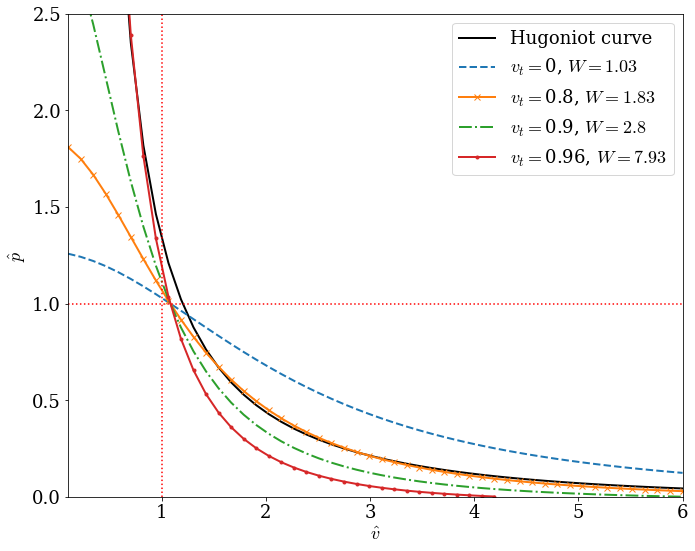

In [5]:
gamma = 5/3
vts = [0, 0.8, 0.9, 0.96]
Vs = numpy.linspace(0.1, 6)
r_ps = []
Ws = []
vs = 0.25
q = 0.5

for vt in vts:
    Ws.append(1/numpy.sqrt(1 - vs**2 - vt**2))
    u = vs * Ws[-1]
    r_ps.append(rayleigh(Vs, u, q, gamma))

fig, ax = pyplot.subplots()
line_styles = ['--', '-x', '-.', '.-', ':']
ax.plot(Vs, hugoniot(Vs, q, gamma), 'k', linewidth=2, label='Hugoniot curve')
for r, vt, ls, W in zip(r_ps, vts, line_styles, Ws):
    ax.plot(Vs, r, ls, linewidth=2, label=f'$v_t = ${vt}, $W = {W:.3}$')
ax.plot(Vs, numpy.ones_like(Vs), 'r:')
ax.plot([1,1], [0, 20], 'r:')
ax.set_xlabel(r'$\hat{v}$')
ax.set_ylabel(r'$\hat{p}$')
ax.set_xlim([Vs[0], Vs[-1]])
ax.set_ylim([0, 2.5])
ax.legend()
pyplot.tight_layout()
pyplot.show()

## Inert relativistic Riemann problem, varying $v_t$

Exact solution of the inert relativistic Riemann problem for different initial tangential velocities. All cases share the initial conditions $(\rho, v_x, \varepsilon)_L = (1, 0, 10)$, $(\rho, v_x, \varepsilon)_R = (1, 0, 1)$. For the blue curves, $v_t (L, R) = (0,0)$, for the orange dashed curves, $v_t (L, R) = (0,0.9)$, and for the green dot-dashed curves, $v_t (L, R) = (0.9,0.9)$. The final state consists of a left-going rarefaction wave, a contact wave and a right-going shock wave: $\mathcal{R}_\leftarrow \,\mathcal{C}\, \mathcal{S}_\rightarrow$. Increasing the tangential velocity alters the intermediate state, reducing the normal velocity.

In [6]:
vtls = [0., 0., 0.9]
vtrs = [0., 0.9, 0.9]
gamma = 5./3.

eos = eos_defns.eos_gamma_law(gamma)
rhos = []
ps = []
vs = []
vts = []
xis = []

for n, (vtl, vtr) in enumerate(zip(vtls, vtrs)):

    U_left = State(1.0, 0.0, vtl, 10.0, eos, label="L")
    U_right = State(1.0, 0, vtr, 1.0, eos, label="R")
    
    rp = RiemannProblem(U_left, U_right)
    
    data = rp.state_l.state()
    xi = [-1.05]
    
    for wave in rp.waves:
        xi_wave, data_wave = wave.plotting_data()
        xi = numpy.hstack((xi, xi_wave))
        data = numpy.vstack((data, data_wave))
    xi = numpy.hstack((xi, [1.05]))
    data = numpy.vstack((data, rp.state_r.state()))
    
    rhos.append([])
    rhos[-1] = data[:,0]
    ps.append([])
    ps[-1] = data[:,4]
    vs.append([])
    vs[-1] = data[:,1]
    vts.append([])
    vts[-1] = data[:,2]
    xis.append([])
    xis[-1] = xi

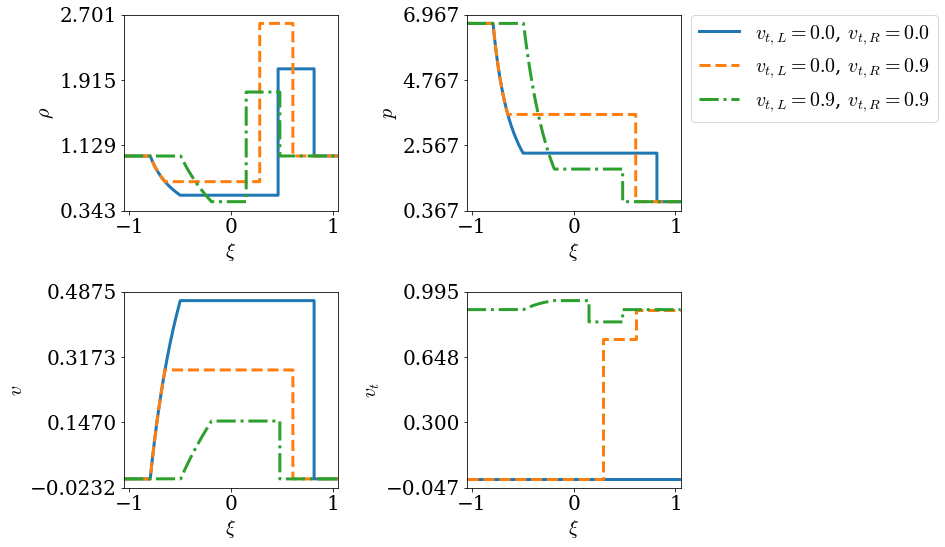

In [7]:
rcParams['figure.figsize'] = (10, 8)
pyplot.rc("font", size=20)

fig, axs = pyplot.subplots(2,2)
lstyles = ['-', '--', '-.', ':']

# density 
for n, r in enumerate(rhos):
    lab = r'$v_{t,L}' + f' = {vtls[n]}$, ' + r'$v_{t,R}' + f' = {vtrs[n]}$'
    axs[0,0].plot(xis[n], r, lstyles[n], label=lab)
axs[0,0].set_xlim([-1.05, 1.05])
axs[0,0].set_xlabel(r'$\xi$')
axs[0,0].set_ylabel(r'$\rho$')
ylims = axs[0,0].get_ylim()
axs[0,0].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[0,0].get_lines(), 'linewidth', 3)

# pressure
for n, p in enumerate(ps):
    lab = r'$v_{t,L}' + f' = {vtls[n]}$, ' + r'$v_{t,R}' + f' = {vtrs[n]}$'
    axs[0,1].plot(xis[n], p, lstyles[n], label=lab)
axs[0,1].set_xlim([-1.05, 1.05])
axs[0,1].set_xlabel(r'$\xi$')
axs[0,1].set_ylabel(r'$p$')
ylims = axs[0,1].get_ylim()
axs[0,1].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[0,1].get_lines(), 'linewidth', 3)

# v
for n, v in enumerate(vs):
    lab = r'$v_{t,L}' + f' = {vtls[n]}$, ' + r'$v_{t,R}' + f' = {vtrs[n]}$'
    axs[1,0].plot(xis[n], v, lstyles[n], label=lab)
axs[1,0].set_xlim([-1.05, 1.05])
axs[1,0].set_xlabel(r'$\xi$')
axs[1,0].set_ylabel(r'$v$')
ylims = axs[1,0].get_ylim()
axs[1,0].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[1,0].get_lines(), 'linewidth', 3)

# vt
for n, vt in enumerate(vts):
    lab = r'$v_{t,L}' + f' = {vtls[n]}$, ' + r'$v_{t,R}' + f' = {vtrs[n]}$'
    axs[1,1].plot(xis[n], vt, lstyles[n], label=lab)
axs[1,1].set_xlim([-1.05, 1.05])
axs[1,1].set_xlabel(r'$\xi$')
axs[1,1].set_ylabel(r'$v_t$')
ylims = axs[1,1].get_ylim()
axs[1,1].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[1,1].get_lines(), 'linewidth', 3)

fig.tight_layout()
lgd = axs[0,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pyplot.show()

## Reactive relativistic Riemann problem, DDT varying $q$

Deflagration to detonation transition for different values of $q = (0.01, 0.6, 0.7)$, corresponding to the solid blue, dashed orange and dotted green curves respectively. The initial conditions are $(\rho, v_x, v_t, \varepsilon)_L = (1, 0, 0, 5.0)$, $(\rho, v_x, v_t, \varepsilon)_R = (1, -0.3, 0, 2)$. For $q=0.01$, the solution is a CJ deflagration, $\mathcal{(CJDF_\leftarrow\,R_\leftarrow)C\,S_\rightarrow}$. As $q$ is increased to $q=0.6$, the CJ deflagration becomes a weak deflagration, $\mathcal{WDF_\leftarrow\, C\,S_\rightarrow}$, and at $q=0.7$ this has transitioned to a CJ detonation, $\mathcal{(CJDT_\leftarrow\,R_\leftarrow)C\,S_\rightarrow}$. 

In [8]:
qs = [0.01, 0.6, 0.7]
gamma = 5/3

eos = eos_defns.eos_gamma_law(gamma)
rhos = []
ps = []
vs = []
vts = []
xis = []

for n, q in enumerate(qs):
    eos_reactive = eos_defns.eos_gamma_law_react(gamma, q, 1.0, 1.0, eos)

    U_reactive = State(1.0, 0.0, 0, 5.0, eos_reactive)
    U_burnt = State(1, -0.3, 0, 2, eos)
    
    rp = RiemannProblem(U_reactive, U_burnt)
    
    data = rp.state_l.state()
    xi = [-1.05]
    
    for wave in rp.waves:
        xi_wave, data_wave = wave.plotting_data()
        xi = numpy.hstack((xi, xi_wave))
        data = numpy.vstack((data, data_wave))
    xi = numpy.hstack((xi, [1.05]))
    data = numpy.vstack((data, rp.state_r.state()))
    
    rhos.append([])
    rhos[-1] = data[:,0]
    ps.append([])
    ps[-1] = data[:,4]
    vs.append([])
    vs[-1] = data[:,1]
    vts.append([])
    vts[-1] = data[:,2]
    xis.append([])
    xis[-1] = xi

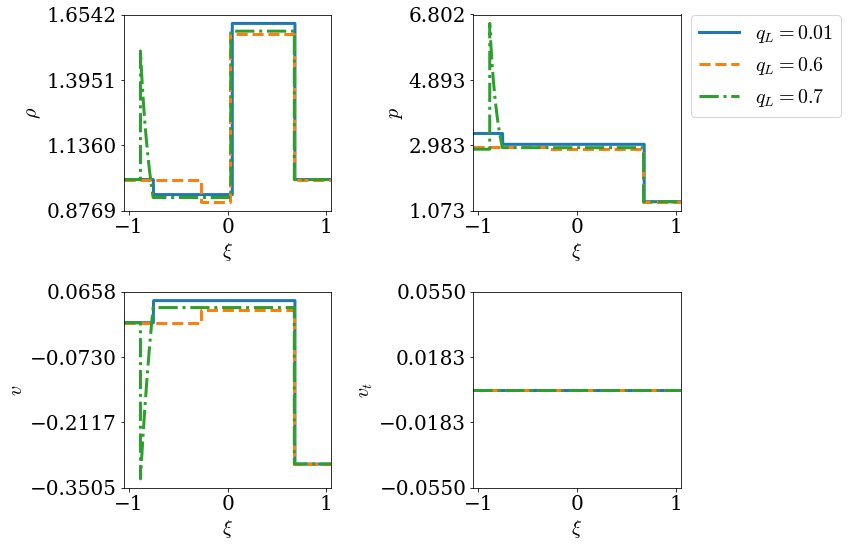

In [9]:
rcParams['figure.figsize'] = (10, 8)
pyplot.rc("font", size=20)

fig, axs = pyplot.subplots(2,2)
lstyles = ['-', '--', '-.', ':']

# density 
for n, r in enumerate(rhos):
    lab = r'$q_{L}' + f' = {qs[n]}$'
    axs[0,0].plot(xis[n], r, lstyles[n], label=lab)
axs[0,0].set_xlim([-1.05, 1.05])
axs[0,0].set_xlabel(r'$\xi$')
axs[0,0].set_ylabel(r'$\rho$')
ylims = axs[0,0].get_ylim()
axs[0,0].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[0,0].get_lines(), 'linewidth', 3)

# pressure
for n, p in enumerate(ps):
    lab = r'$q_{L}' + f' = {qs[n]}$'
    axs[0,1].plot(xis[n], p, lstyles[n], label=lab)
axs[0,1].set_xlim([-1.05, 1.05])
axs[0,1].set_xlabel(r'$\xi$')
axs[0,1].set_ylabel(r'$p$')
ylims = axs[0,1].get_ylim()
axs[0,1].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[0,1].get_lines(), 'linewidth', 3)

# v
for n, v in enumerate(vs):
    lab = r'$q_{L}' + f' = {qs[n]}$'
    axs[1,0].plot(xis[n], v, lstyles[n], label=lab)
axs[1,0].set_xlim([-1.05, 1.05])
axs[1,0].set_xlabel(r'$\xi$')
axs[1,0].set_ylabel(r'$v$')
ylims = axs[1,0].get_ylim()
axs[1,0].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[1,0].get_lines(), 'linewidth', 3)

# vt
for n, vt in enumerate(vts):
    lab = r'$q_{L}' + f' = {qs[n]}$'
    axs[1,1].plot(xis[n], vt, lstyles[n], label=lab)
axs[1,1].set_xlim([-1.05, 1.05])
axs[1,1].set_xlabel(r'$\xi$')
axs[1,1].set_ylabel(r'$v_t$')
ylims = axs[1,1].get_ylim()
axs[1,1].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[1,1].get_lines(), 'linewidth', 3)

fig.tight_layout()
lgd = axs[0,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Reactive relativistic Riemann problem, DDT varying $v_t$

Deflagration to detonation transition for different values of $v_{t,L} = (0.0, 0.3, 0.6, 0.8)$, corresponding to the solid blue, dashed orange, dash-dotted green and dotted red lines respectively. The initial conditions are $(\rho, v_x, v_t, \varepsilon)_L = (1, 0, 0, 5.0)$, $(\rho, v_x, v_t, \varepsilon)_R = (1, -0.3, v_t, 2)$. For $v_{t,L} = 0$, the solution is $\mathcal{(CJDF_\leftarrow\,R_\leftarrow)\,C\,S_\rightarrow}$. At $v_{t,L} = 0.3$, the CJ deflagration has transitioned to a weak deflagration, producing the solution $\mathcal{WDF_\leftarrow\,C\,S_\rightarrow}$. At $v_t = 0.6$, the deflagration has transitioned to a CJ detonation, $\mathcal{(CJDT_\leftarrow\,R_\leftarrow)\,C\,S_\rightarrow}$, then at $v_t = 0.8$, this has transitioned to a strong detonation, $\mathcal{SDT_\leftarrow\,C\,S_\rightarrow}$.

In [10]:
vtls = [0, 0.3, 0.6, 0.8]
q = 0.01
gamma = 5./3.

eos = eos_defns.eos_gamma_law(gamma)
rhos = []
ps = []
vs = []
vts = []
xis = []

for n, vt in enumerate(vtls):
    eos_reactive = eos_defns.eos_gamma_law_react(gamma, q, 1.0, 1.0, eos)

    U_reactive = State(1.0, 0.0, 0, 5.0, eos_reactive)
    U_burnt = State(1, -0.3, vt, 2, eos)
    
    rp = RiemannProblem(U_reactive, U_burnt)
    
    data = rp.state_l.state()
    xi = [-1.05]
    
    for wave in rp.waves:
        xi_wave, data_wave = wave.plotting_data()
        xi = numpy.hstack((xi, xi_wave))
        data = numpy.vstack((data, data_wave))
    xi = numpy.hstack((xi, [1.05]))
    data = numpy.vstack((data, rp.state_r.state()))
    
    rhos.append([])
    rhos[-1] = data[:,0]
    ps.append([])
    ps[-1] = data[:,4]
    vs.append([])
    vs[-1] = data[:,1]
    vts.append([])
    vts[-1] = data[:,2]
    xis.append([])
    xis[-1] = xi

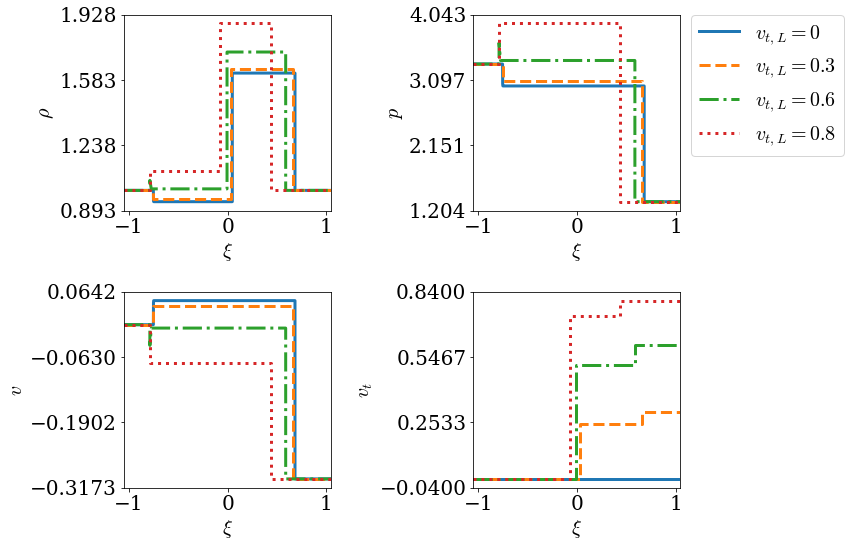

In [11]:
rcParams['figure.figsize'] = (10, 8)
pyplot.rc("font", size=20)

fig, axs = pyplot.subplots(2,2)
lstyles = ['-', '--', '-.', ':']

# density 
for n, r in enumerate(rhos):
    lab = r'$v_{t,L}' + f' = {vtls[n]}$'
    axs[0,0].plot(xis[n], r, lstyles[n], label=lab)
axs[0,0].set_xlim([-1.05, 1.05])
axs[0,0].set_xlabel(r'$\xi$')
axs[0,0].set_ylabel(r'$\rho$')
ylims = axs[0,0].get_ylim()
axs[0,0].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[0,0].get_lines(), 'linewidth', 3)

# pressure
for n, p in enumerate(ps):
    lab = r'$v_{t,L}' + f' = {vtls[n]}$'
    axs[0,1].plot(xis[n], p, lstyles[n], label=lab)
axs[0,1].set_xlim([-1.05, 1.05])
axs[0,1].set_xlabel(r'$\xi$')
axs[0,1].set_ylabel(r'$p$')
ylims = axs[0,1].get_ylim()
axs[0,1].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[0,1].get_lines(), 'linewidth', 3)

# v
for n, v in enumerate(vs):
    lab = r'$v_{t,L}' + f' = {vtls[n]}$'
    axs[1,0].plot(xis[n], v, lstyles[n], label=lab)
axs[1,0].set_xlim([-1.05, 1.05])
axs[1,0].set_xlabel(r'$\xi$')
axs[1,0].set_ylabel(r'$v$')
ylims = axs[1,0].get_ylim()
axs[1,0].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[1,0].get_lines(), 'linewidth', 3)

# vt
for n, vt in enumerate(vts):
    lab = r'$v_{t,L}' + f' = {vtls[n]}$'
    axs[1,1].plot(xis[n], vt, lstyles[n], label=lab)
axs[1,1].set_xlim([-1.05, 1.05])
axs[1,1].set_xlabel(r'$\xi$')
axs[1,1].set_ylabel(r'$v_t$')
ylims = axs[1,1].get_ylim()
axs[1,1].yaxis.set_ticks(numpy.linspace(ylims[0], ylims[1], num=4, endpoint=True))
pyplot.setp(axs[1,1].get_lines(), 'linewidth', 3)

fig.tight_layout()
lgd = axs[0,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)